In [1]:
from preprocess.preprocess import load_dataset, compute_label_agg, select_data, get_data_loaders, undersample

import torch
import torch.nn as nn
import torch.optim as optim

from models.RNN import MMRNN
from utils.RNN_utils import *

d:\SUTD\T6\DL Project\Deep_Learning_ECGclassification\utils\RNN_utils.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# Define device for torch
use_cuda = True
device = torch.device("cuda" if (
    use_cuda and torch.cuda.is_available()) else "cpu")
print(device)

cuda


# Define options


In [3]:
EPOCH = 20
LOAD_DATASET = True
TRAIN_PATH = './PTB_train_undersampled.pt'
VALID_PATH = './PTB_valid_undersampled.pt'
TEST_PATH = './PTB_test_undersampled.pt'
SAVE_NAME = f'MMRNN_undersampled_augmented_rm_epoch_{EPOCH}'
SAVE_DIR = './model_saves/'
BATCH_SIZE = 64


torch.manual_seed(1)

# Loading the main dataset


In [4]:
if LOAD_DATASET:
    train_loader = torch.load(TRAIN_PATH)
    valid_loader = torch.load(VALID_PATH)
    test_loader = torch.load(TEST_PATH)
else:
    path = './data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/'

    data, raw_labels = load_dataset(path)

    labels = compute_label_agg(raw_labels, path)

    data, labels, y = select_data(data, labels)

    data, labels, y = undersample(data, labels, y)

    train_loader, valid_loader, test_loader = get_data_loaders(
        data, labels, y, BATCH_SIZE)

    torch.save(train_loader, TRAIN_PATH)
    torch.save(valid_loader, VALID_PATH)
    torch.save(test_loader, TEST_PATH)

# Loading the augmented data loaders

In [5]:
train_loader_rm = torch.load('./trainloader_augmented_rm.pt')
valid_loader_rm = torch.load('./validloader_augmented_rm.pt')
test_loader_rm = torch.load('./testloader_augmented_rm.pt')

train_loader_rn = torch.load('./trainloader_augmented_rn.pt')
valid_loader_rn = torch.load('./validloader_augmented_rn.pt')
test_loader_rn = torch.load('./testloader_augmented_rn.pt')

# Combining the undersampled dataset with the Random Masking augmented dataset

In [6]:
combined_train_rm_ds = torch.utils.data.ConcatDataset([train_loader.dataset, train_loader_rm.dataset])
combined_valid_rm_ds = torch.utils.data.ConcatDataset([valid_loader.dataset, valid_loader_rm.dataset])
combined_test_rm_ds = torch.utils.data.ConcatDataset([test_loader.dataset, test_loader_rm.dataset])

combined_rm_trainloader = torch.utils.data.DataLoader(combined_train_rm_ds, batch_size=BATCH_SIZE, shuffle=True)
combined_rm_validloader = torch.utils.data.DataLoader(combined_valid_rm_ds, batch_size=BATCH_SIZE)
combined_rm_testloader = torch.utils.data.DataLoader(combined_test_rm_ds, batch_size=BATCH_SIZE)

# Training the model with Random Masking augmented data


In [7]:

model = MMRNN().to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-2)
criterion = nn.BCEWithLogitsLoss()

model = train_RNN(EPOCH, combined_rm_trainloader, combined_rm_validloader, model,
                  criterion, optimizer, device=device, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: [1/20], Step [3968/316160] | Train Loss:  0.580         | Train Accuracy:  0.630         | Val Loss:  0.436         | Val Accuracy:  0.689
Model saved to ==> ./model_saves/model_MMRNN_undersampled_augmented_rn_epoch_20.pt
Epoch: [1/20], Step [7936/316160] | Train Loss:  0.480         | Train Accuracy:  0.703         | Val Loss:  0.394         | Val Accuracy:  0.762
Model saved to ==> ./model_saves/model_MMRNN_undersampled_augmented_rn_epoch_20.pt
Epoch: [1/20], Step [11904/316160] | Train Loss:  0.434         | Train Accuracy:  0.743         | Val Loss:  0.369         | Val Accuracy:  0.784
Model saved to ==> ./model_saves/model_MMRNN_undersampled_augmented_rn_epoch_20.pt
Epoch: [1/20], Step [15808/316160] | Train Loss:  0.414         | Train Accuracy:  0.762         | Val Loss:  0.376         | Val Accuracy:  0.798
Epoch: [2/20], Step [19776/316160] | Train Loss:  0.333         | Train Accuracy:  0.840         | Val Loss:  0.369         | Val Accuracy:  0.806
Model saved to ==>

## Evaluate and plot losses


Test Accuracy:  0.839


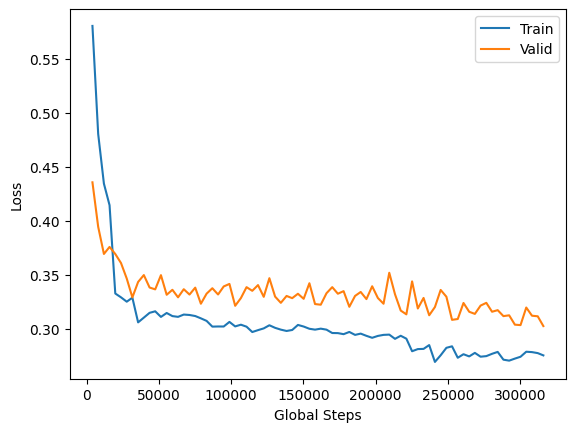

In [8]:
test_accuracy = evaluate_RNN(model, combined_rm_testloader)
plot_losses(metrics_save_name=SAVE_NAME, save_dir=SAVE_DIR)
rename_with_acc(SAVE_NAME, SAVE_DIR, test_accuracy)

# Combining the undersampled dataset with the Random Noising augmented dataset

In [9]:

combined_train_rn_ds = torch.utils.data.ConcatDataset([train_loader.dataset, train_loader_rn.dataset])
combined_valid_rn_ds = torch.utils.data.ConcatDataset([valid_loader.dataset, valid_loader_rn.dataset])
combined_test_rn_ds = torch.utils.data.ConcatDataset([test_loader.dataset, test_loader_rn.dataset])

combined_rn_trainloader = torch.utils.data.DataLoader(combined_train_rn_ds, batch_size=BATCH_SIZE, shuffle=True)
combined_rn_validloader = torch.utils.data.DataLoader(combined_valid_rn_ds, batch_size=BATCH_SIZE)
combined_rn_testloader = torch.utils.data.DataLoader(combined_test_rn_ds, batch_size=BATCH_SIZE)

# Redefine options

In [10]:
SAVE_NAME = f'MMRNN_undersampled_augmented_rn_epoch_{EPOCH}'

# Training the model with Random Noising augmented data

In [11]:

model = MMRNN().to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-2)
criterion = nn.BCEWithLogitsLoss()

model = train_RNN(EPOCH, combined_rn_trainloader, combined_rn_validloader, model,
                  criterion, optimizer, device=device, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: [1/20], Step [4032/320500] | Train Loss:  0.562         | Train Accuracy:  0.610         | Val Loss:  0.408         | Val Accuracy:  0.741
Model saved to ==> ./model_saves/model_MMRNN_undersampled_augmented_rn_epoch_20.pt
Epoch: [1/20], Step [8064/320500] | Train Loss:  0.473         | Train Accuracy:  0.690         | Val Loss:  0.377         | Val Accuracy:  0.770
Model saved to ==> ./model_saves/model_MMRNN_undersampled_augmented_rn_epoch_20.pt
Epoch: [1/20], Step [12032/320500] | Train Loss:  0.432         | Train Accuracy:  0.731         | Val Loss:  0.379         | Val Accuracy:  0.782
Epoch: [1/20], Step [16025/320500] | Train Loss:  0.410         | Train Accuracy:  0.755         | Val Loss:  0.359         | Val Accuracy:  0.799
Model saved to ==> ./model_saves/model_MMRNN_undersampled_augmented_rn_epoch_20.pt
Epoch: [2/20], Step [20057/320500] | Train Loss:  0.335         | Train Accuracy:  0.829         | Val Loss:  0.352         | Val Accuracy:  0.805
Model saved to ==>

## Evaluate and plot losses


Test Accuracy:  0.842


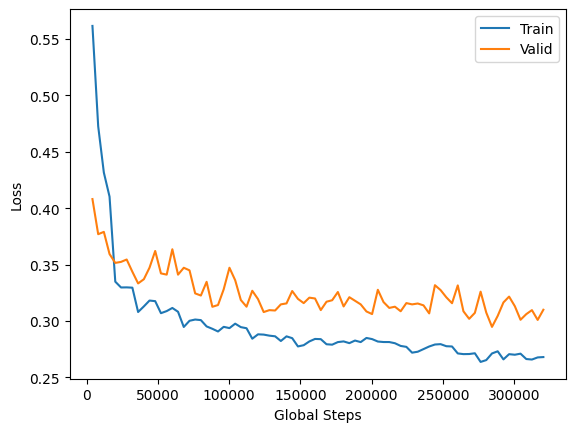

In [12]:
test_accuracy = evaluate_RNN(model, combined_rn_testloader)
plot_losses(metrics_save_name=SAVE_NAME, save_dir=SAVE_DIR)
rename_with_acc(SAVE_NAME, SAVE_DIR, test_accuracy)